In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from market import IntegratedMarketModel

In [2]:
n_firms = 10 
n_consumers = 500
n_chars = 2
T = 1
s = 100

In [3]:
model = IntegratedMarketModel(
        n_firms, 
        n_consumers, 
        n_chars, 
        T, 
        seed=s
    )
model.demand_side_optimisation()


In [4]:
vp1 = model.v_p[:,0]
print(vp1.shape)
price1 = model.prices[:,0]

e=0 


market_shares, all_probs, mean_indirect_utility = model.compute_share(vp1, price1, e)
J_true = model.construct_Jacobian(all_probs, vp1)
print(J_true)
print(all_probs)

(500,)
[[-0.03615375  0.00139656  0.00138834  0.00121834  0.00132981  0.00122326
   0.0015097   0.00151208  0.00130038  0.00123095]
 [ 0.00139656 -0.03759494  0.00143722  0.00126134  0.00137685  0.00126556
   0.00156333  0.00156589  0.00134656  0.00127365]
 [ 0.00138834  0.00143722 -0.03713316  0.00125384  0.00136854  0.00125904
   0.00155363  0.00155607  0.00133823  0.00126693]
 [ 0.00121834  0.00126134  0.00125384 -0.03282476  0.00120103  0.00110455
   0.00136356  0.00136574  0.0011745   0.00111153]
 [ 0.00132981  0.00137685  0.00136854  0.00120103 -0.03579558  0.00120533
   0.00148848  0.00149088  0.00128209  0.00121299]
 [ 0.00122326  0.00126556  0.00125904  0.00110455  0.00120533 -0.03229794
   0.00136773  0.00136965  0.00117818  0.0011181 ]
 [ 0.0015097   0.00156333  0.00155363  0.00136356  0.00148848  0.00136773
  -0.0406088   0.00169298  0.0014558   0.00137653]
 [ 0.00151208  0.00156589  0.00155607  0.00136574  0.00149088  0.00136965
   0.00169298 -0.04073659  0.0014582   0.001

In [5]:
vp2 = np.random.normal(0, 1, n_consumers)
J_approx = model.construct_Jacobian(all_probs, vp2)
print(J_approx)


J_true_flat = J_true.flatten()
J_approx_flat = J_approx.flatten()


# Compare the matrices element-wise with a tolerance of 0.2
comparison = np.allclose(J_true, J_approx, atol=1e-03)

# Print the result
if comparison:
    print("The matrices are approximately the same.")
else:
    print("The matrices are different.")


[[-0.0391617   0.00161457  0.00160963  0.00141097  0.00153865  0.00142888
   0.00174365  0.00174521  0.00150227  0.00143596]
 [ 0.00161457 -0.04059803  0.00166223  0.00145719  0.00158917  0.00147475
   0.00180114  0.00180284  0.00155177  0.0014822 ]
 [ 0.00160963  0.00166223 -0.04023845  0.00145264  0.00158408  0.00147123
   0.00179509  0.00179668  0.00154659  0.00147849]
 [ 0.00141097  0.00145719  0.00145264 -0.03553348  0.00138865  0.00128931
   0.00157372  0.00157515  0.00135585  0.00129573]
 [ 0.00153865  0.00158917  0.00158408  0.00138865 -0.03869789  0.00140567
   0.0017163   0.00171789  0.00147868  0.00141273]
 [ 0.00142888  0.00147475  0.00147123  0.00128931  0.00140567 -0.03533061
   0.00159228  0.00159344  0.00137193  0.00131441]
 [ 0.00174365  0.00180114  0.00179509  0.00157372  0.0017163   0.00159228
  -0.04379081  0.00194721  0.00167599  0.00160038]
 [ 0.00174521  0.00180284  0.00179668  0.00157515  0.00171789  0.00159344
   0.00194721 -0.0438918   0.0016776   0.00160159]


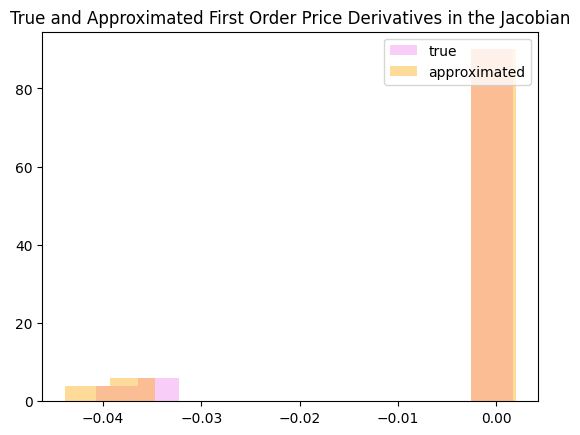

In [6]:
plt.hist(J_true_flat, 
         bins=10,
         alpha=0.4, 
         label='true',
         color='violet') # customized color parameter
  
plt.hist(J_approx_flat,
         bins=10, 
         alpha=0.4,
         label='approximated',
         color='orange')

plt.title('True and Approximated First Order Price Derivatives in the Jacobian')
plt.legend(loc='upper right')
plt.show()

In [7]:
wage = 10 
theta_0 = 1
theta_L = 0.3 
theta_K = 0.7
q= np.ones(2)

productivity_shocks = np.ones((2,2))
capital = np.ones((2,2))

t = 0

MC = (wage*(1/theta_L))*((q)/(np.exp(theta_0 + productivity_shocks[:,t])*
              capital[:,t]**theta_K))**((1/theta_L)-1) *(1/(np.exp(theta_0 + productivity_shocks[:,t])*
              capital[:,t]**theta_K))

print(MC)

[0.04242113 0.04242113]


In [8]:
x = np.array([[1, 2, 3], [4, 5, 6]])
print(x.shape)

(2, 3)


In [9]:
n_cons = 3
n_firms = 3
product_chars = np.array(([1, 3, 3], [1, 2, 2], [5, 5, 5]))
mu = -4
omega = 0.5
v_p = np.array([4, 5, 6])
price = np.ones(n_firms)
beta = np.array([1, 0.5, 0.5])

mean_indirect_utility = product_chars@beta - mu*price

mean_indirect_utility_for_utility = np.repeat(mean_indirect_utility, n_cons, axis=0)

price_r = np.reshape(price, (1, n_firms))
alpha_i = np.reshape((omega*v_p), (n_cons, 1))



random_coeff = np.ravel((alpha_i@price_r).T)



u = mean_indirect_utility_for_utility  + random_coeff + e
print(u)

u_r = np.reshape(u, (n_firms, n_cons))
print(u_r)
sum_u = np.sum(np.exp(u_r), axis=0)
print(sum_u)

all_probs = np.exp(u_r)/(1 + sum_u)
print(all_probs)
market_shares = (np.sum(all_probs, axis=1))/n_cons
# # market_shares = np.sum(all_probs, axis=1)/self.n_consumers
p1 = all_probs[0, :]
print(p1)



[10.  10.5 11.   9.   9.5 10.  16.  16.5 17. ]
[[10.  10.5 11. ]
 [ 9.   9.5 10. ]
 [16.  16.5 17. ]]
[ 8916240.07023025 14700394.65845743 24236853.3610853 ]
[[2.47037576e-03 2.47037587e-03 2.47037593e-03]
 [9.08800453e-04 9.08800494e-04 9.08800518e-04]
 [9.96620712e-01 9.96620756e-01 9.96620782e-01]]
[0.00247038 0.00247038 0.00247038]


In [10]:
J = np.zeros((n_firms, n_firms))
alphas = mu + omega*v_p
print(alphas)
print(all_probs)
for i in range(J.shape[0]):
    print('i', i)
    p1 = all_probs[i, :]
    for j in range(J.shape[1]):
        print('j', j)
        if i == j:
            J[i, j] = np.sum(alphas * p1 - alphas * (p1 ** 2))/(n_cons)
        else: 
            p2 = all_probs[j, :]
            print(p1)
            print(p2)
            print('check shape', -alphas * p1 * p2 )
            J[i, j] = np.sum((-alphas * p1 * p2))/(n_cons)

print(J)


[-2.  -1.5 -1. ]
[[2.47037576e-03 2.47037587e-03 2.47037593e-03]
 [9.08800453e-04 9.08800494e-04 9.08800518e-04]
 [9.96620712e-01 9.96620756e-01 9.96620782e-01]]
i 0
j 0
j 1
[0.00247038 0.00247038 0.00247038]
[0.0009088 0.0009088 0.0009088]
check shape [4.49015722e-06 3.36761821e-06 2.24507893e-06]
j 2
[0.00247038 0.00247038 0.00247038]
[0.99662071 0.99662076 0.99662078]
check shape [0.00492406 0.00369304 0.00246203]
i 1
j 0
[0.0009088 0.0009088 0.0009088]
[0.00247038 0.00247038 0.00247038]
check shape [4.49015722e-06 3.36761821e-06 2.24507893e-06]
j 1
j 2
[0.0009088 0.0009088 0.0009088]
[0.99662071 0.99662076 0.99662078]
check shape [0.00181146 0.00135859 0.00090573]
i 2
j 0
[0.99662071 0.99662076 0.99662078]
[0.00247038 0.00247038 0.00247038]
check shape [0.00492406 0.00369304 0.00246203]
j 1
[0.99662071 0.99662076 0.99662078]
[0.0009088 0.0009088 0.0009088]
check shape [0.00181146 0.00135859 0.00090573]
j 2
[[-3.69640962e-03  3.36761812e-06  3.69304169e-03]
 [ 3.36761812e-06 -1.3619

In [11]:
a1, a2 = model.get_alphas()
print(a1)
print(a2)

[[-0.86074835]
 [-1.30804817]
 [-1.53819117]
 [-1.16126833]
 [-1.48626187]
 [-1.35370296]
 [-1.2766455 ]
 [-0.986089  ]
 [-1.17597881]
 [-1.28531046]
 [-1.11448744]
 [-1.33246778]
 [-1.08684716]
 [-1.43816704]
 [-1.39730329]
 [-1.19616161]
 [-1.09827847]
 [-1.50072232]
 [-1.11893   ]
 [-0.97661414]
 [-1.68842532]
 [-1.66249758]
 [-1.16139768]
 [-1.03201464]
 [-1.26731912]
 [-1.47316985]
 [-1.41368542]
 [-1.60369642]
 [-1.14425342]
 [-1.23507933]
 [-1.27695702]
 [-0.91517187]
 [-1.04993635]
 [-1.43805399]
 [-1.41919378]
 [-1.11495117]
 [-1.54948784]
 [-0.87099124]
 [-0.9312013 ]
 [-0.95457706]
 [-1.09539187]
 [-1.06861739]
 [-1.22319087]
 [-1.08048742]
 [-1.58399417]
 [-0.86362285]
 [-1.00334356]
 [-1.31193291]
 [-0.88451509]
 [-1.63909256]
 [-0.96309471]
 [-1.09422983]
 [-1.01206295]
 [-1.03501252]
 [-1.2482876 ]
 [-1.35196882]
 [-1.02793767]
 [-1.56814587]
 [-1.20210928]
 [-1.02229868]
 [-1.02392197]
 [-1.22596439]
 [-1.28090765]
 [-1.22471689]
 [-0.88064043]
 [-0.991197  ]
 [-1.38072

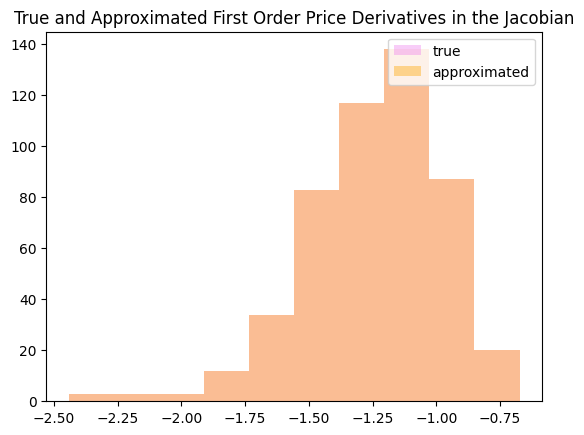

In [12]:
plt.hist(a1, 
         bins=10,
         alpha=0.4, 
         label='true',
         color='violet') # customized color parameter
  
plt.hist(a2,
         bins=10, 
         alpha=0.4,
         label='approximated',
         color='orange')

plt.title('True and Approximated First Order Price Derivatives in the Jacobian')
plt.legend(loc='upper right')
plt.show()